# Практическая задача

1. Загрузить реальный датасет для задачи регресии с использованием openml
2. Обучить модель GradientBoostingRegressor
3. Вывести Accuracy и Confusion matrix
4. Визуализировать ROC кривую

In [25]:
import openml
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score

In [9]:
dataset = openml.datasets.get_dataset(1510)
X, y, _, _ = dataset.get_data(target=dataset.default_target_attribute)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [23]:
model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.01, max_depth=6)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [24]:
print("Accuracy:\n", accuracy_score(y_test, y_pred), "\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy:
 0.9532163742690059 
Confusion Matrix:
 [[104   4]
 [  4  59]]


In [27]:
prob = model.predict_proba(X_test)[:,1]
fpr, tpr, _ = roc_curve(y_test, prob,  pos_label='2')
auc = roc_auc_score(y_test, prob)

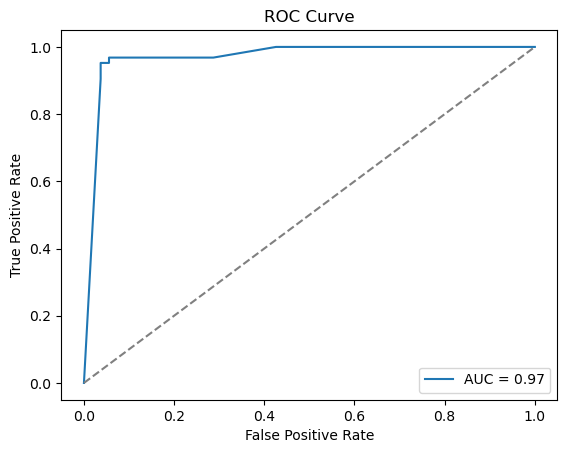

In [30]:
plt.plot(fpr, tpr, label=f"AUC = {auc:.2f}")
plt.plot([0,1],[0,1],'--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()